In [1]:
import osmnx as ox
import momepy
import geosnap
import matplotlib.pyplot as plt
from pyrosm import OSM

Loading manifest: 100%|██████████| 5/5 [00:00<00:00, 10613.12entries/s]
/Users/knaaptime/anaconda3/envs/maxp_emp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.spectral module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
Loading manifest: 100%|██████████| 3/3 [00:00<00:00, 1818.34entries/s]


dc = geosnap.Community.from_census(state_fips='11').gdf
dc = dc[dc.year==2010]
dc.plot()
bbox_geom = dc['geometry'].unary_union
bbox_geom
osm = OSM("../data/us-south-latest.osm.pbf", bounding_box=bbox_geom)
osm.bounding_box

In [2]:
osm = OSM("../data/district-of-columbia-latest.osm.pbf")

In [3]:
dc_bounds = osm.get_boundaries()

In [4]:
dc_bounds.head()

,admin_level,boundary,border_type,id,timestamp,version,tags,geometry,osm_type,name,operator,ref,website,changeset
0,8,administrative,None,34310859,1437271602,19,"{""source"":""TIGER/Line\u00AE 2008 Place Shapefi...","LINESTRING (-77.11977 38.93428, -77.11929 38.9...",way,NaN,NaN,NaN,NaN,NaN
1,9,administrative,suburb,329740250,1579700137,10,None,"LINESTRING (-77.01492 38.95670, -77.01453 38.9...",way,NaN,NaN,NaN,NaN,NaN
2,9,administrative,None,329959214,1583392990,6,"{""place"":""suburb""}","LINESTRING (-77.01281 38.97387, -77.01328 38.9...",way,NaN,NaN,NaN,NaN,NaN
3,9,administrative,suburb,330116427,1550221718,5,None,"LINESTRING (-77.00023 38.94724, -77.00087 38.9...",way,NaN,NaN,NaN,NaN,NaN
4,9,administrative,suburb,330131688,1560154501,5,None,"LINESTRING (-77.01682 38.94641, -77.01666 38.9...",way,NaN,NaN,NaN,NaN,NaN


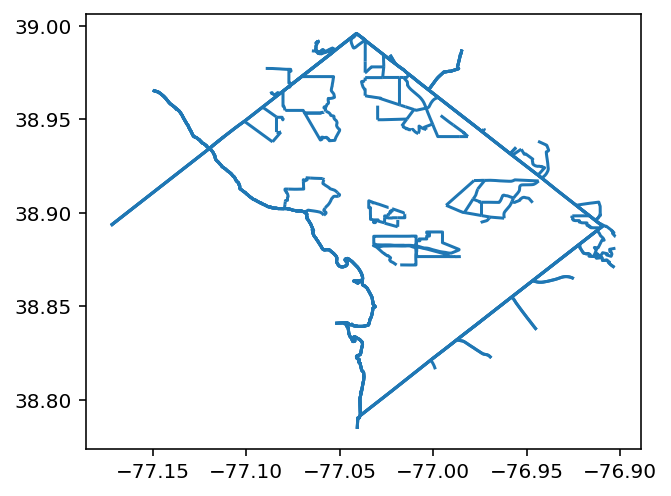

In [5]:
dc_bounds.plot()

In [6]:
dc_roads = osm.get_network(network_type='driving')

In [7]:
dc_roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22135 entries, 0 to 22134
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   access         1187 non-null   object  
 1   bicycle        785 non-null    object  
 2   bridge         434 non-null    object  
 3   cycleway       644 non-null    object  
 4   foot           504 non-null    object  
 5   highway        22135 non-null  object  
 6   junction       166 non-null    object  
 7   lanes          6994 non-null   object  
 8   lit            95 non-null     object  
 9   maxspeed       1028 non-null   object  
 10  motorcar       1 non-null      object  
 11  motor_vehicle  72 non-null     object  
 12  name           10927 non-null  object  
 13  oneway         6416 non-null   object  
 14  overtaking     15 non-null     object  
 15  psv            1 non-null      object  
 16  ref            862 non-null    object  
 17  service        2758 non

In [22]:
dc_bldgs = osm.get_buildings()

In [23]:
dc_bldgs = ox.project_gdf(dc_bldgs)

In [24]:
#dc_bldgs.plot()

In [17]:
dc_bldgs.geometry[1].geom_type

'Polygon'

In [25]:
dc_bldgs = dc_bldgs[dc_bldgs.geometry.geom_type=='Polygon']

In [27]:

buildings = momepy.preprocess(dc_bldgs, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tess = momepy.Tessellation(buildings, unique_id='uID', limit=limit)
tessellation = tess.tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 3115/3115 [05:44<00:00,  9.04it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 64/64 [00:08<00:00,  7.13it/s]


Inward offset...
Discretization...


  0%|          | 12/139776 [00:00<3:53:15,  9.99it/s]

Generating input point array...


100%|██████████| 139776/139776 [05:38<00:00, 412.99it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 14184333/14184333 [12:32<00:00, 18854.70it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


  2%|▏         | 43/1994 [00:00<00:10, 184.85it/s]

Identifying edge cells...


  0%|          | 9/4108 [00:00<00:46, 88.41it/s]

Cutting...


100%|██████████| 4108/4108 [00:48<00:00, 83.93it/s] 
/Users/knaaptime/anaconda3/envs/maxp_emp/lib/python3.7/site-packages/momepy/elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [33, 251, 1684, 1772, 2104, 2119, 3435, 15507, 15512, 18256, 18407, 18528, 18868, 18912, 18979, 19021, 19291, 19305, 19484, 19491, 26816, 30364, 30990, 31019, 35534, 36715, 45819, 45982, 46308, 46677, 56190, 69559, 70826, 80945, 80946, 80950, 81005, 81007, 82317, 82319, 82325, 82408, 84008, 84009, 84010, 94517, 94598, 94603, 94741, 108774, 108878, 126680, 138735, 138771, 138792, 138923, 138928, 138930, 138934, 138936, 138941, 138950, 138957, 138958, 138961, 138962, 138970, 138973, 138974, 138979, 138982, 138984, 138986, 138987, 138997, 139008, 139011, 139020, 139023, 139032, 139042, 139043, 139276, 139488, 139537, 139571]
  "unique_id of affected elements: {}".format(list(uids))


In [28]:
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 139684 entries, 0 to 139850
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   addr:city          15704 non-null   object  
 1   addr:country       13911 non-null   object  
 2   addr:housenumber   117159 non-null  object  
 3   addr:housename     100 non-null     object  
 4   addr:postcode      62115 non-null   object  
 5   addr:place         10 non-null      object  
 6   addr:street        117343 non-null  object  
 7   email              18 non-null      object  
 8   name               2121 non-null    object  
 9   opening_hours      122 non-null     object  
 10  operator           123 non-null     object  
 11  phone              245 non-null     object  
 12  ref                4 non-null       object  
 13  url                23 non-null      object  
 14  website            351 non-null     object  
 15  building           139684 

In [31]:
tessellation.head()

,uID,geometry
0,0,"POLYGON ((324341.977 4306283.310, 324339.291 4..."
1,1,"POLYGON ((324259.649 4306285.818, 324256.271 4..."
2,2,"POLYGON ((318962.380 4311800.296, 318961.760 4..."
3,3,"POLYGON ((318826.288 4311927.918, 318825.662 4..."
4,4,"POLYGON ((318946.517 4311894.672, 318946.516 4..."


In [33]:
tessellation.to_file("../data/dc_tess.shp")

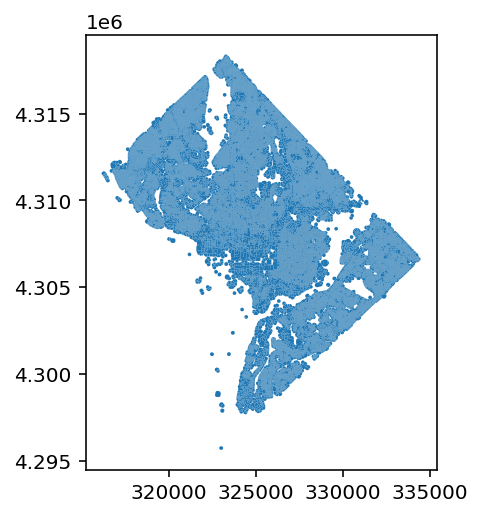

In [34]:
tessellation.plot()

In [35]:
buildings.to_file("../data/dc_buildings.shp")